In [1]:
from os import chdir as cd
import glob

pathin = '/Users/ethan/Documents/GitHub/CLA_2019/Coding/Friday Exercises/Data/Hall_MOTCHI/'

folders = ['Hall_CHI','Hall_MOT']

pro = []
work = []

cd(pathin + folders[1])
for file in glob.glob('*.txt'):
    with open(file,'r') as f:
        text = f.read()
        if 'Pro' in file:
            pro.append(text)
        if 'Work' in file:
            work.append(text)


tokens_pro = []
tokens_work = []
types_pro = []
types_work = []
TTR_pro = []
TTR_work = []

for transcript in pro:
    tokens = transcript.split()
    tokens_pro.append(len(tokens))
    types = set(transcript.split())
    types_pro.append(len(types))
    try:
        TTR_pro.append(len(types)/len(tokens))
    except:
        pass
    
for transcript in work:
    tokens = transcript.split()
    tokens_work.append(len(tokens))
    types = set(transcript.split())
    types_work.append(len(types))
    try:
        TTR_work.append(len(types)/len(tokens))
    except:
        pass

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pro = ["WhiteCollar"] * len(TTR_pro)
work = ["BlueCollar"] * len(TTR_work)
CDS = TTR_pro + TTR_work
SES = pro + work
df = pd.DataFrame(
    {'TTR': CDS,
     'SES': SES,
    })

#inspect the data
df.head() # look at the top of the data
# df.tail() # look at the bottom of the data
# df #look at all of the data

,SES,TTR
0,WhiteCollar,0.181593
1,WhiteCollar,0.117124
2,WhiteCollar,0.136625
3,WhiteCollar,0.193290
4,WhiteCollar,0.322072


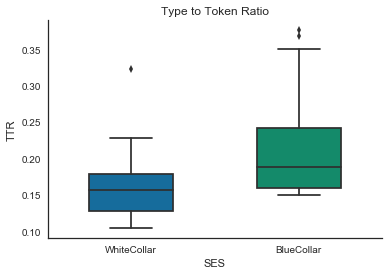

In [4]:
# make boxplot with Seaborn
sns.set_style('white')

p = sns.boxplot(y = 'TTR', x = 'SES',
                data = df,
                width=0.5,
                palette="colorblind")

p.set_title("Type to Token Ratio")
sns.despine()